In [1]:
# essential ones:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# files handling in Colab:
from google.colab import files
from io import StringIO

# loop iteration visualization:
from tqdm import tqdm

SS_types_mapping = {'I':'H', 'G':'H',
                    'B':'E',
                    'S':'C', 'T':'C'}

In [ ]:
'CTTIIICCSSSCCCEEEBBB'.translate(str.maketrans(SS_types_mapping))

'CCCHHHCCCCCCCCEEEEEE'

In [2]:
uploaded = files.upload()

Saving 06_Bsubtilis_Bsubtilis_datafile.fas to 06_Bsubtilis_Bsubtilis_datafile.fas
Saving 06_Bsubtilis_Ecoli_datafile.fas to 06_Bsubtilis_Ecoli_datafile.fas
Saving 06_Dvulgaris_Dvulgaris_datafile.fas to 06_Dvulgaris_Dvulgaris_datafile.fas
Saving 06_Dvulgaris_Ecoli_datafile.fas to 06_Dvulgaris_Ecoli_datafile.fas
Saving 06_Llactis_Ecoli_datafile.fas to 06_Llactis_Ecoli_datafile.fas
Saving 06_Llactis_Llactis_datafile.fas to 06_Llactis_Llactis_datafile.fas
Saving 06_Pfluorescens_Ecoli_datafile.fas to 06_Pfluorescens_Ecoli_datafile.fas
Saving 06_Pfluorescens_Pfluorescens_datafile.fas to 06_Pfluorescens_Pfluorescens_datafile.fas
Saving 06_Pputida_Ecoli_datafile.fas to 06_Pputida_Ecoli_datafile.fas
Saving 06_Pputida_Pputida_datafile.fas to 06_Pputida_Pputida_datafile.fas
Saving 06_Senterica_Ecoli_datafile.fas to 06_Senterica_Ecoli_datafile.fas
Saving 06_Senterica_Senterica_datafile.fas to 06_Senterica_Senterica_datafile.fas
Saving 06_Srubiginosus_Ecoli_datafile.fas to 06_Srubiginosus_Ecoli_dat

In [3]:
datafiles = {}
species_names = ['Bsubtilis', 'Dvulgaris', 'Llactis', 'Pfluorescens', 'Pputida', 'Senterica', 'Srubiginosus', 'Tthermophilus']
f = 0
for i, species_name in enumerate(species_names):
  d = {}
  while f <= i*2:
    d[list(uploaded.keys())[f]] = uploaded[list(uploaded.keys())[f]].decode('utf-8').split('\n')
    d[list(uploaded.keys())[f+1]] = uploaded[list(uploaded.keys())[f+1]].decode('utf-8').split('\n')
    f += 2
  datafiles[species_name] = d

In [4]:
class Datafile:
  """
  AA and SS sequences container
  """
  def __init__(self, source, expr_sys):
    self.source = source
    self.expr_sys = expr_sys
    self.fasta_file = datafiles[self.source]['06_%s_%s_datafile.fas' %(self.source, self.expr_sys)]
    self.AA_seq = self.fasta_file[1].replace('*', '')
    self.SS_seq = self.fasta_file[3].replace('*', '')
    self.SS_seq_3 = self.SS_seq.translate(str.maketrans(SS_types_mapping))
    self.len = len(self.AA_seq)

  def AA_count(self, aa):
    return self.AA_seq.count(aa)

  def SS_count(self, ss):
    return self.SS_seq.count(ss)

In [5]:
BS_BS = Datafile(source='Bsubtilis', expr_sys='Bsubtilis')
BS_EC = Datafile(source='Bsubtilis', expr_sys='Ecoli')
DV_DV = Datafile(source='Dvulgaris', expr_sys='Dvulgaris')
DV_EC = Datafile(source='Dvulgaris', expr_sys='Ecoli')
LL_LL = Datafile(source='Llactis', expr_sys='Llactis')
LL_EC = Datafile(source='Llactis', expr_sys='Ecoli')
PF_PF = Datafile(source='Pfluorescens', expr_sys='Pfluorescens')
PF_EC = Datafile(source='Pfluorescens', expr_sys='Ecoli')
PP_PP = Datafile(source='Pputida', expr_sys='Pputida')
PP_EC = Datafile(source='Pputida', expr_sys='Ecoli')
SE_SE = Datafile(source='Senterica', expr_sys='Senterica')
SE_EC = Datafile(source='Senterica', expr_sys='Ecoli')
SR_SR = Datafile(source='Srubiginosus', expr_sys='Srubiginosus')
SR_EC = Datafile(source='Srubiginosus', expr_sys='Ecoli')
TT_TT = Datafile(source='Tthermophilus', expr_sys='Tthermophilus')
TT_EC = Datafile(source='Tthermophilus', expr_sys='Ecoli')

In [6]:
def count_string_diffs(str1, str2, normalize=True):
  """
  Counts differences between 2 strings
  normalize=True returns a proportion
  """
  # check if strings are of equal length
  if len(str1) != len(str2):
    raise BaseException('Strings are not of equal length')
  # count differences
  c = 0
  for i in range(len(str1)):
    if str1[i] != str2[i]:
      c += 1
  # normalization
  if normalize == True:
    c = c / len(str1)

  return c

In [7]:
def permute_string_diffs(str1, str2, str_len='same', normalize=True, size=1):
  """
  Creates random strings with same relative positions and calculates differences between them
  Strings str1 and str2 have to be of equal length
  """
  # check if strings are of equal length
  if len(str1) != len(str2):
    raise BaseException('Strings are not of equal length')
  # check if new string lengths are to be the same
  if str_len == 'same':
    srt_len = len(str1)
  # loop for size creation
  results = np.empty(shape=(size))
  for r in range(size):
    # create a random integer array
    ints = np.random.randint(low=0, high=len(str1), size=str_len)
    # count differences between random "strings"
    c = 0
    for i in ints:
      if str1[i] != str2[i]:
        c += 1
    # normalization
    if normalize == True:
      c = c / len(ints)
    results[r] = c
  return results

In [8]:
def permute_SS_datafiles(df1, df2, str_len='same', normalize=True, size=1, n_SS_states=8):
  """
  Combines count_string_diffs and permute_string_diffs to be used with SS Datafile class
  """
  # get strings
  if n_SS_states == 8:
    str1 = df1.SS_seq
    str2 = df2.SS_seq
  elif n_SS_states == 3:
    str1 = df1.SS_seq_3
    str2 = df2.SS_seq_3
  # get actual and permuted distances
  actual = count_string_diffs(str1, str2, normalize=normalize)
  perm = permute_string_diffs(str1, str2, str_len=str_len, normalize=normalize, size=size)
  return actual, perm

In [9]:
df_list = []

for s in tqdm(species_names):
  df1 = Datafile(s, s)
  df2 = Datafile(s, 'Ecoli')
  res = permute_SS_datafiles(df1, df2, str_len=10000, normalize=True, size=10000, n_SS_states=8)
  df_list.append(res[0])
  df_list.append(np.mean(res[1]))
  df_list.append(np.percentile(res[1], 2.5))
  df_list.append(np.percentile(res[1], 97.5))
  df_list.append(res[1])

n_rows = len(species_names)
n_cols = len(df_list) // n_rows

SS_diffs = pd.DataFrame(np.array(df_list).reshape((n_rows, n_cols)), index=species_names,
                        columns=['actual', 'perm_mean', 'iqr_low', 'iqr_high', 'perm'])

100%|██████████| 8/8 [03:10<00:00, 23.75s/it]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


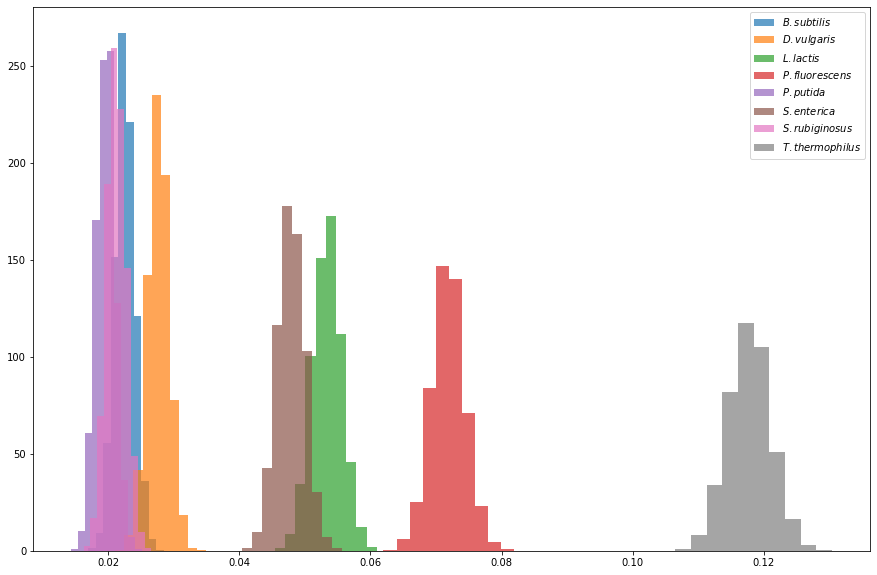

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
for s in SS_diffs.index:
  s_name = s[0] + ' .' + s[1:]
  d = SS_diffs.loc[s]
  plt.hist(d.perm, label='$\it{%s}$' %s_name, density=True, alpha=0.7)
  plt.legend()

In [11]:
SS_diffs['perm_adjusted'] = SS_diffs.perm - SS_diffs.perm_mean

In [12]:
SS_diffs['p_value'] = [np.sum(SS_diffs.loc[s].perm_adjusted >= SS_diffs.loc[s].perm_mean) / len(SS_diffs.loc[s].perm) for s in SS_diffs.index]

In [13]:
SS_diffs

,actual,perm_mean,iqr_low,iqr_high,perm,perm_adjusted,p_value
Bsubtilis,0.0225749,0.0225535,0.0197,0.0255,"[0.0236, 0.023, 0.0225, 0.0243, 0.0232, 0.0235...","[0.0010465399999999986, 0.00044653999999999874...",0.0
Dvulgaris,0.0276474,0.0276634,0.0244,0.0309,"[0.0288, 0.0295, 0.0251, 0.0271, 0.0274, 0.025...","[0.001136630000000003, 0.0018366300000000023, ...",0.0
Llactis,0.0533446,0.053367,0.049,0.0577025,"[0.0509, 0.0514, 0.0531, 0.0549, 0.0565, 0.055...","[-0.002467030000000002, -0.0019670300000000016...",0.0
Pfluorescens,0.0717937,0.0718041,0.0667,0.077,"[0.0681, 0.0713, 0.0729, 0.0722, 0.0702, 0.069...","[-0.0037041099999999966, -0.000504109999999988...",0.0
Pputida,0.019636,0.0196268,0.0169,0.0224,"[0.02, 0.018, 0.0189, 0.0196, 0.0206, 0.0194, ...","[0.0003732400000000004, -0.0016267600000000014...",0.0
Senterica,0.0478907,0.0478926,0.0438,0.0521,"[0.0508, 0.0506, 0.0474, 0.0474, 0.045, 0.0443...","[0.002907359999999991, 0.002707359999999992, -...",0.0
Srubiginosus,0.0212684,0.0212804,0.0185,0.0241,"[0.0201, 0.0182, 0.0245, 0.0205, 0.0211, 0.024...","[-0.0011804200000000015, -0.003080420000000000...",0.0
Tthermophilus,0.11778,0.117774,0.1115,0.1242,"[0.1127, 0.1198, 0.1189, 0.1159, 0.1153, 0.123...","[-0.005074040000000002, 0.002025960000000007, ...",0.0


In [14]:
df_list_3 = []

for s in tqdm(species_names):
  df1 = Datafile(s, s)
  df2 = Datafile(s, 'Ecoli')
  res = permute_SS_datafiles(df1, df2, str_len=10000, normalize=True, size=10000, n_SS_states=3)
  df_list_3.append(res[0])
  df_list_3.append(np.mean(res[1]))
  df_list_3.append(np.percentile(res[1], 2.5))
  df_list_3.append(np.percentile(res[1], 97.5))
  df_list_3.append(res[1])

n_rows = len(species_names)
n_cols = len(df_list_3) // n_rows

SS_diffs_3 = pd.DataFrame(np.array(df_list_3).reshape((n_rows, n_cols)), index=species_names,
                        columns=['actual', 'perm_mean', 'iqr_low', 'iqr_high', 'perm'])

100%|██████████| 8/8 [03:17<00:00, 24.69s/it]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


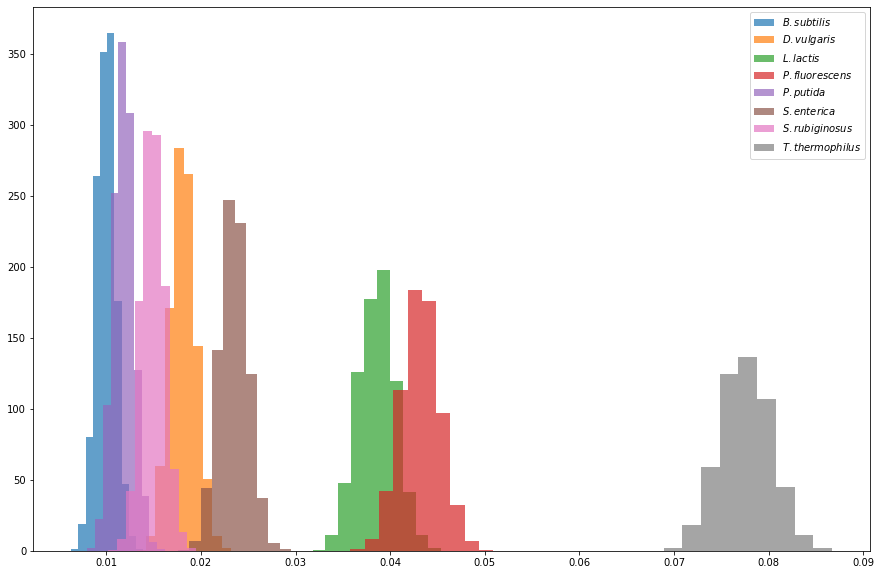

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
for s in SS_diffs_3.index:
  s_name = s[0] + ' .' + s[1:]
  d = SS_diffs_3.loc[s]
  plt.hist(d.perm, label='$\it{%s}$' %s_name, density=True, alpha=0.7)
  plt.legend()

In [16]:
SS_diffs_3['perm_adjusted'] = SS_diffs_3.perm - SS_diffs_3.perm_mean

In [17]:
SS_diffs_3['p_value'] = [np.sum(SS_diffs_3.loc[s].perm_adjusted >= SS_diffs_3.loc[s].perm_mean) / len(SS_diffs_3.loc[s].perm) for s in SS_diffs_3.index]

In [18]:
SS_diffs_3

,actual,perm_mean,iqr_low,iqr_high,perm,perm_adjusted,p_value
Bsubtilis,0.00994636,0.00994356,0.008,0.0119,"[0.0095, 0.0109, 0.0093, 0.0089, 0.0113, 0.009...","[-0.0004435599999999991, 0.0009564400000000011...",0.0
Dvulgaris,0.0180903,0.0180787,0.0155,0.0207,"[0.0182, 0.0156, 0.018, 0.0204, 0.018, 0.0169,...","[0.00012133000000000282, -0.002478669999999999...",0.0
Llactis,0.0385267,0.0385684,0.0348,0.0424,"[0.0399, 0.0405, 0.0411, 0.0397, 0.0372, 0.036...","[0.001331639999999995, 0.0019316399999999984, ...",0.0
Pfluorescens,0.0432156,0.0432138,0.0392,0.0473,"[0.0473, 0.0431, 0.0457, 0.0428, 0.0419, 0.043...","[0.0040862200000000015, -0.0001137800000000008...",0.0
Pputida,0.0117918,0.011786,0.0097,0.0139,"[0.013, 0.0116, 0.0115, 0.012, 0.0116, 0.0127,...","[0.0012140199999999997, -0.0001859800000000005...",0.0
Senterica,0.023481,0.0234726,0.0206,0.0264025,"[0.023, 0.024, 0.0266, 0.0242, 0.0223, 0.0207,...","[-0.00047255000000000214, 0.000527449999999998...",0.0
Srubiginosus,0.014892,0.0149126,0.0126,0.0173,"[0.0129, 0.015, 0.016, 0.0165, 0.0159, 0.0148,...","[-0.0020126499999999995, 8.734999999999993e-05...",0.0
Tthermophilus,0.0775764,0.0775368,0.0724,0.0828,"[0.0763, 0.076, 0.0803, 0.0737, 0.0824, 0.0765...","[-0.0012368199999999996, -0.001536820000000008...",0.0


# Heatmaps

In [19]:
def shuffle_heatmap(df1, df2, str_len, n_SS_states=8):

  AA_types = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','X','Y']
  AA1 = df1.AA_seq
  AA2 = df2.AA_seq

  if n_SS_states == 8:
    SS1 = df1.SS_seq
    SS2 = df2.SS_seq
    SS_types = ['B','C','E','G','H','I','S','T']
  elif n_SS_states == 3:
    SS1 = df1.SS_seq_3
    SS2 = df2.SS_seq_3
    SS_types = ['C','E','H']
  
  random_ints = np.random.randint(low=0, high=len(SS1), size=str_len)

  count_matrix_1 = pd.DataFrame(np.full((len(SS_types), len(AA_types)), fill_value=0), columns=AA_types, index=SS_types)
  count_matrix_2 = pd.DataFrame(np.full((len(SS_types), len(AA_types)), fill_value=0), columns=AA_types, index=SS_types)
  for i in random_ints:
    count_matrix_1.loc[SS1[i], AA1[i]] += 1
    count_matrix_2.loc[SS2[i], AA2[i]] += 1
  
  D_matrix = (count_matrix_1 - count_matrix_2) / str_len

  sns.heatmap(D_matrix, linewidth=0.5, center = 0, cmap=sns.diverging_palette(10, 200, sep=50, as_cmap=True),
                vmax = 0.008, vmin = -0.008, xticklabels=D_matrix.columns, yticklabels=D_matrix.index,
                square = True, cbar_kws={'orientation': 'horizontal'})

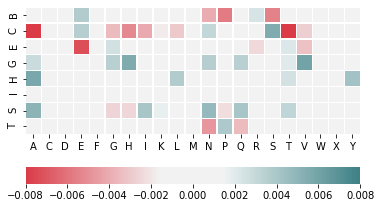

In [20]:
shuffle_heatmap(TT_TT, TT_EC, 10000)

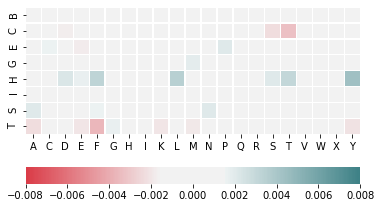

In [21]:
shuffle_heatmap(PF_PF, PF_EC, 10000)

In [ ]:
SS_diffs_long = SS_diffs.explode('perm')

In [22]:
sns.histplot(SS_diffs_long.perm)

NameError: ignored

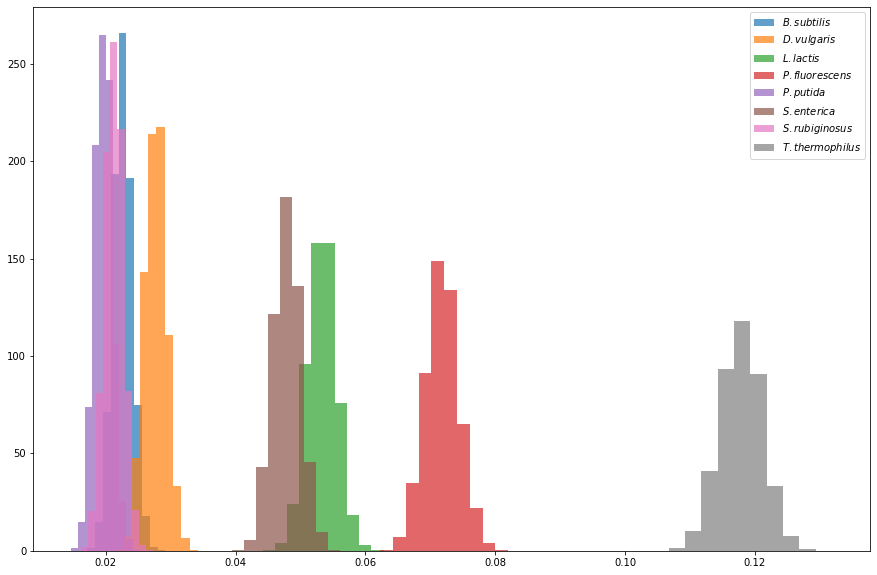

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
for s in SS_diffs.index:
  s_name = s[0] + ' .' + s[1:]
  d = SS_diffs_long.loc[s]
  plt.hist(d.perm, label='$\it{%s}$' %s_name, density=True, alpha=0.7)
  plt.legend()